In [2]:
data = {
    'age': ['<=30', '<=30', '31..40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

In [3]:
import pandas as pd
df=pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [4]:
import math
# Function to calculate Entropy for an attribute
def entropy(data):
    total_count = len(data)
    if total_count == 0:
        return 0
    counts = data.value_counts()
    entropy_value = -sum((count / total_count) * math.log2(count / total_count) for count in counts)
    return entropy_value

In [13]:
# Function to calculate Information Gain for an attribute
def calculate_information_gains(dataframe, target_column):
    information_gains = {}
    root_entropy = entropy(dataframe[target_column])

    for attribute in dataframe.columns:
        if attribute == target_column:
            continue
        weighted_entropy = 0
        for value in dataframe[attribute].unique():
            subset = dataframe[dataframe[attribute] == value]
            subset_entropy = entropy(subset[target_column])
            weight = len(subset) / len(dataframe)
            weighted_entropy += weight * subset_entropy
        information_gain_value = root_entropy - weighted_entropy
        information_gains[attribute] = information_gain_value

    return information_gains

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate the target variable
target = df['buys_computer']
features = df.drop('buys_computer', axis=1)

# Define categorical columns for one-hot encoding
categorical_cols = ['age', 'income', 'student', 'credit_rating']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Create a Decision Tree model and a pipeline to preprocess and fit the model
tree_classifier = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', tree_classifier)])
pipeline.fit(features, target)

# Get the depth of the constructed tree
tree_depth = tree_classifier.get_depth()

print(f"The depth of the Decision Tree is: {tree_depth}")

The depth of the Decision Tree is: 4


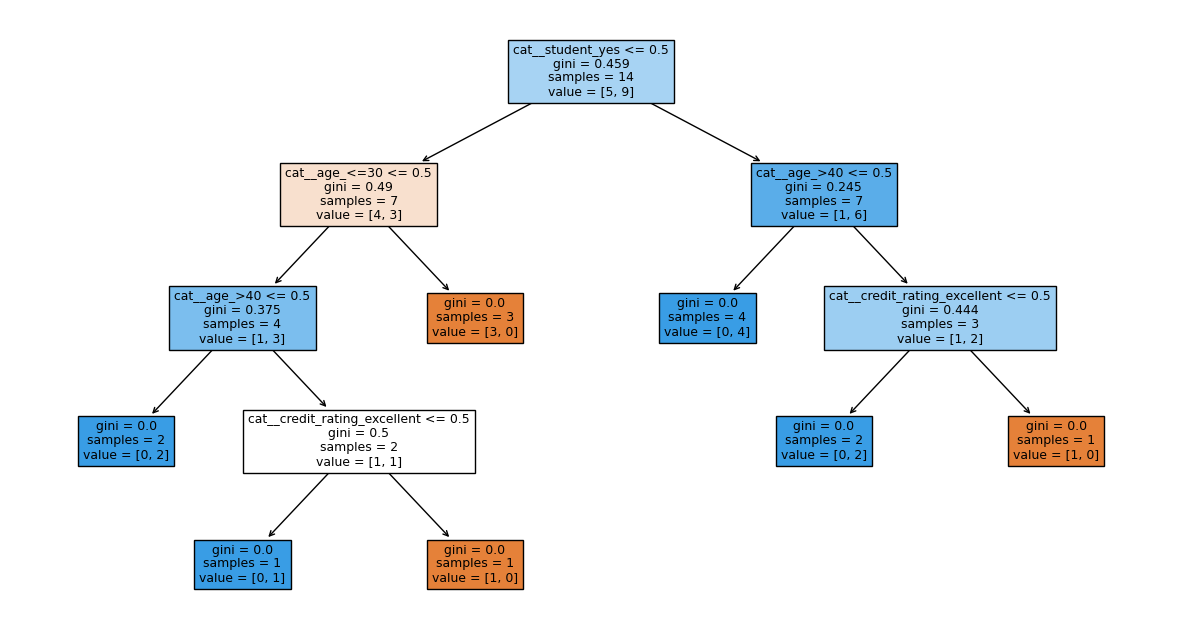

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plot_tree(tree_classifier, filled=True, feature_names=list(pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=categorical_cols)))
plt.show()

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y=np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_labelpixel.npy")
X=np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_pixel.npy")
print(X.shape,y.shape)

(16384, 13) (16384, 1)


In [15]:
# Reshape your data into a 2D format (pixels x features)
num_samples = X.shape[0]   # Total number of pixels
num_features = X.shape[1]  # Number of features for each pixel

In [16]:
X_reshaped = X.reshape(num_samples, num_features)
y_reshaped = y.reshape(num_samples)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)

(16384, 13) (16384,)


In [17]:
# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

In [18]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Classifier Accuracy:", accuracy_tree)

Decision Tree Classifier Accuracy: 0.4800122062862374


In [19]:
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(X_train, y_train)
training_accuracy_entropy = model_entropy.score(X_train, y_train)
print("Training Set Accuracy (Entropy Criterion):", training_accuracy_entropy)
test_accuracy_entropy = model_entropy.score(X_test, y_test)
print("Test Set Accuracy (Entropy Criterion):", test_accuracy_entropy)

Training Set Accuracy (Entropy Criterion): 0.6554512855725948
Test Set Accuracy (Entropy Criterion): 0.47268843454379006


In [39]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Classifier Accuracy:", accuracy_tree)

Decision Tree Classifier Accuracy: 0.5605736954531584


<Figure size 1200x600 with 0 Axes>

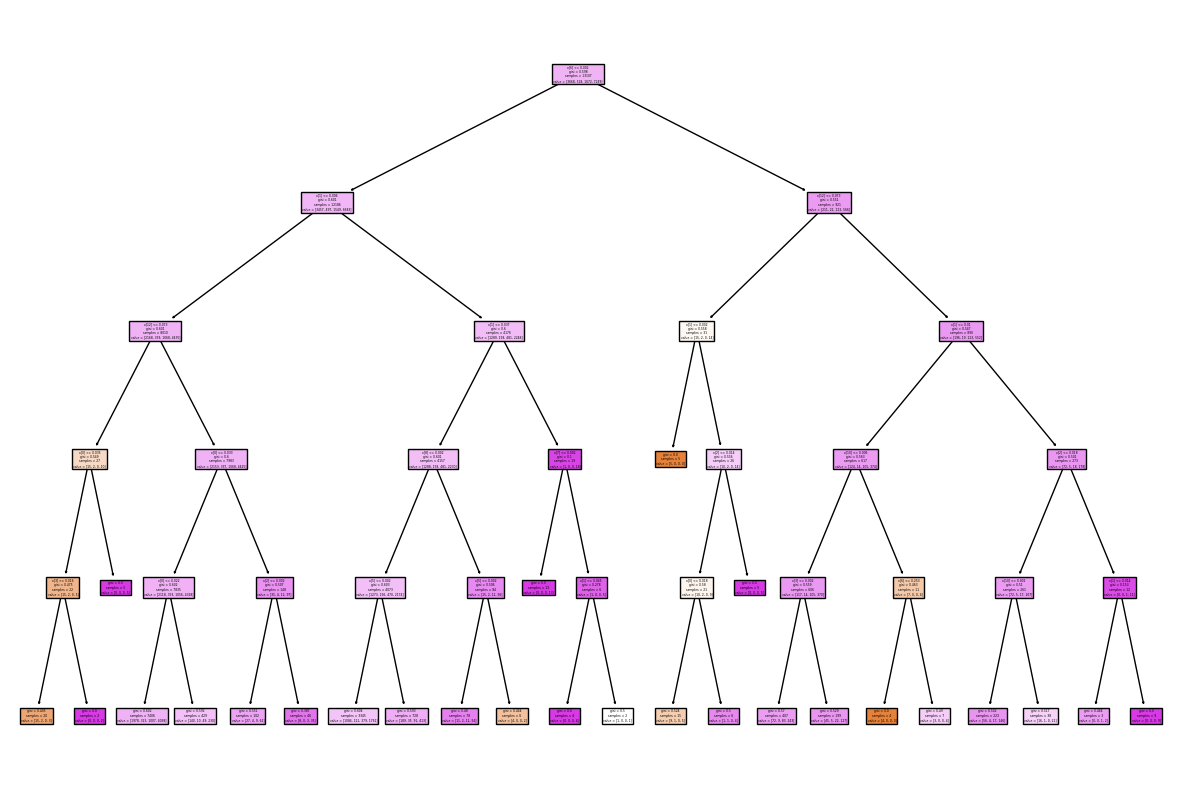

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=None, class_names=None)
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Test Set Accuracy:", accuracy_decision_tree)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)


y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Test Set Accuracy:", accuracy_random_forest)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))


Decision Tree Test Set Accuracy: 0.480622520598108
Random Forest Test Set Accuracy: 0.5093072932560269

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.20      0.24       936
           1       0.00      0.00      0.00       126
         128       0.11      0.05      0.07       376
         255       0.56      0.74      0.64      1839

    accuracy                           0.48      3277
   macro avg       0.25      0.25      0.24      3277
weighted avg       0.41      0.48      0.43      3277


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.15      0.20       936
           1       0.11      0.01      0.01       126
         128       0.13      0.03      0.05       376
         255       0.56      0.83      0.66      1839

    accuracy                           0.51      3277
   macro avg       0.28      0.25      0.23      3277
weight